In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
path_1 = Path('/Users/oleseifert/Documents/Techlabs/SoSe-21-Team-10_Main/data/raw')
df = pd.read_csv(path_1.joinpath('2000-2002.csv'), index_col='date', parse_dates=True)

In [3]:
# drop the 'fips' column, because it is useless
df = df.drop(['fips'], axis=1)

# Intrpolate the data

In [4]:
df.interpolate(method='time', inplace=True)
df.dropna(how='any', inplace=True)

# Transform the problem into a supervised learning problem

In [5]:
df['target'] = df.score.shift(-1)
df.dropna(inplace=True)

In [6]:
from sklearn.ensemble import RandomForestRegressor

# Split the data into train and test set

In [7]:
X_train = df.drop(['target'], axis = 1).iloc[0:764]
X_test = df.drop(['target'], axis = 1).iloc[764:]
y_train = df.target.iloc[0:764]
y_test = df.target.iloc[764:]

# Create the model

In [8]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [9]:
model.score(X_test, y_test)

0.9924300305906144

In [10]:
prediction = model.predict(X_test)

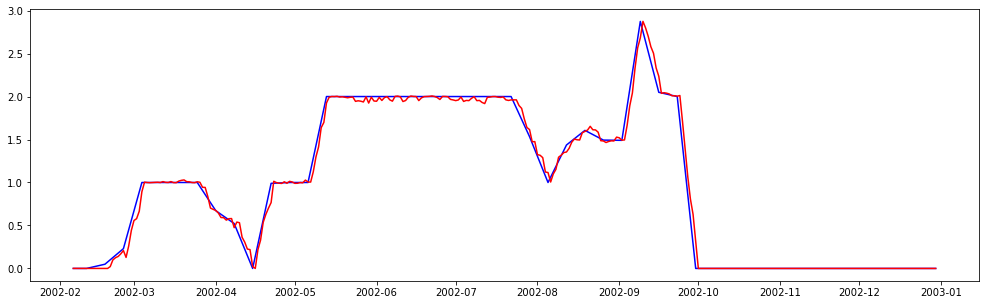

In [11]:
plt.figure(figsize=(17,5))
plt.plot(df.index[764:], y_test, color='blue')
plt.plot(df.index[764:], prediction, color='red')

# Validation of the model

In [12]:
# Import the validation dataframe
path_2 = Path('/Users/oleseifert/Documents/Techlabs/SoSe-21-Team-10_Main/data/raw')
df_validation = pd.read_csv(path_2.joinpath('validation_2.csv'), index_col='date', parse_dates=True)

In [20]:
# Drop the fips column
df_validation = df_validation[df_validation['fips'] == 1001]
df_validation.drop(['fips'], axis=1, inplace=True)

In [14]:
df_validation.head()

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
date,,,,,,,,,,,,,,,,,,,,
2006-01-01,1001,2.57,99.84,10.20,14.53,13.60,13.60,19.88,6.64,13.23,14.48,2.52,3.33,1.87,1.46,5.23,6.99,3.37,3.61,NaN
2006-01-02,1001,3.79,99.46,11.83,19.04,16.23,16.23,24.02,11.73,12.29,18.83,3.77,4.77,2.54,2.23,7.48,8.14,5.78,2.36,NaN
2006-01-03,1001,0.00,100.08,6.56,10.71,7.70,7.70,16.06,6.83,9.23,9.73,2.07,2.74,0.87,1.87,3.71,5.26,1.20,4.06,0.0
2006-01-04,1001,0.00,100.07,7.44,11.04,9.37,9.37,17.98,4.40,13.58,10.31,1.83,2.65,1.10,1.54,3.72,6.15,1.51,4.64,NaN
2006-01-05,1001,0.00,99.87,5.49,8.90,4.76,4.78,12.91,3.61,9.30,8.86,3.12,4.74,1.71,3.03,5.85,7.57,4.21,3.36,NaN


In [15]:
df_validation.tail()

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
date,,,,,,,,,,,,,,,,,,,,
2006-02-24,1001,0.11,100.97,5.14,9.74,4.09,4.11,17.49,2.95,14.54,9.75,2.25,3.34,1.40,1.94,4.91,6.64,1.82,4.81,NaN
2006-02-25,1001,40.23,100.38,7.40,10.28,9.47,9.47,12.98,8.35,4.63,10.25,2.86,4.35,1.37,2.97,5.14,7.35,3.50,3.84,NaN
2006-02-26,1001,0.33,101.07,3.62,5.20,-0.99,-0.93,10.88,-2.19,13.07,5.23,3.53,4.82,1.90,2.92,6.38,7.36,4.84,2.52,NaN
2006-02-27,1001,0.00,101.02,3.77,4.94,-0.58,-0.54,14.45,-4.46,18.91,5.09,1.91,2.49,0.82,1.66,4.31,7.10,1.29,5.81,NaN
2006-02-28,1001,0.00,100.44,6.78,10.28,7.91,7.91,19.15,1.67,17.48,10.29,2.35,3.15,1.67,1.47,5.09,6.61,2.76,3.86,0.0


## Interpolate the validation Dataframe

In [21]:
df_validation.interpolate(method='time', inplace=True)
df_validation.dropna(how='any', inplace=True)

## Transform the data into a supervised learning problem

In [22]:
df_validation['target'] = df_validation.score.shift(-1)
df_validation.dropna(inplace=True)

In [28]:
validation_data = df_validation.drop(['target'], axis=1)
validation_label = df_validation.target

In [27]:
validation_predict = model.predict(validation_data)

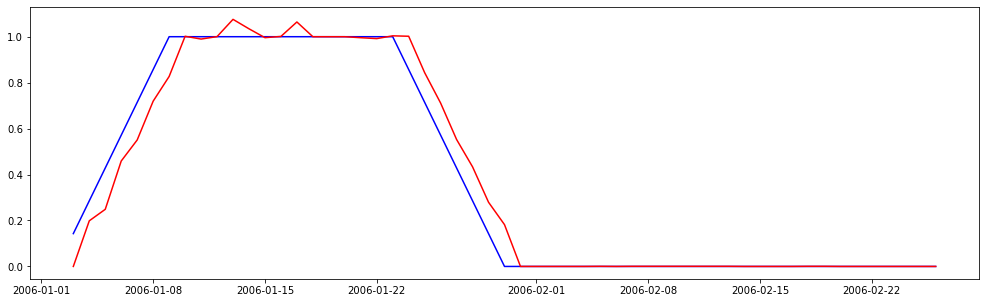

In [38]:
plt.figure(figsize=(17,5))
plt.plot(df_validation.index, validation_label, color='blue')
plt.plot(df_validation.index, validation_predict, color='red')

In [25]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(validation_predict, validation_label)

ValueError: continuous is not supported

In [42]:
validation_label.shape

(55,)

In [45]:
# Potential problem: fips column has different entries. So at the moment we have a model which predicts and does not take the place in consideration